# Eploratory Data Analysis Marketing Campaign Dataset & Dashboard Visualization

[Author]: Wahyudi Trianto  
[Dataset Owner]: Rodolfo Saldanha  
- Introduction  
This notebook contains an exploratory data analysis process, including data cleansing, preparation, handling outliers, creating features for visualization, and data visualization. It uses libraries such as pandas for data preparation, matplotlib & seaborn for visualization, and missingno for handling missing values  
- About The Dataset  
This dataset contains information on marketing campaigns and product sales categories consumed by customers, which can further be categorized based on education level, marital status,, and annual income  
- Column Description:
    - AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    - AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    - AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    - AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    - AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    - Response (Target): 1 if customer accepted the offer in the last campaign, 0 otherwise
    - Complain: 1 if customer complained in the last 2 years
    - DtCustomer: Date of customer’s enrolment with the company
    - Education: Customer’s level of education
    - Marital: Customer’s marital status
    - Kidhome: Number of small children in customer’s household
    - TeenHome: Number of teenagers in customer’s household
    - Income: Customer’s yearly household income
    - MntFishProducts: Amount spent on fish products in the last 2 years
    - MntMeatProducts: Amount spent on meat products in the last 2 years
    - MntFruits: Amount spent on fruits products in the last 2 years
    - MntSweetProducts: Amount spent on sweet products in the last 2 years
    - MntWines: Amount spent on wine products in the last 2 years
    - MntGoldProds: Amount spent on gold products in the last 2 years
    - NumDealsPurchases: Number of purchases made with discount
    - NumCataloguePurchases:  Number of purchases made using catalogue
    - NumStorePurchases: Number of purchases made directly in stores
    - NumWebPurchases: Number of purchases made through company’s website
    - NumWebVisitMonth: Number of visits to company’s website in the last month
    - Recency: Number of days since the last purchases

## Data Understanding & Preparation

In [1]:
# Import the Libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the Dataset
df = pd.read_excel('marketing_campaign.xlsx')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
# Get the shape of the Dataframe
print(df.shape)

(2240, 29)


In [4]:
# Convert Dt_Customer column to datetime object
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%Y-%m-%d')

In [5]:
# Get the head of the Dataframe
print('\n 5 first row of the dataframe:')
df.head()


 5 first row of the dataframe:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
# Get the tail of the dataframe
print('\n 5 last row of the dataframe:')
df.tail()


 5 last row of the dataframe:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,...,7,0,0,0,0,0,0,3,11,1


In [7]:
# Get the Information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [8]:
# Get the summary statistic of dataframe
df.describe().T

,count,mean,min,25%,50%,75%,max,std
ID,2240.0,5592.159821,0.0,2828.25,5458.5,8427.75,11191.0,3246.662198
Year_Birth,2240.0,1968.805804,1893.0,1959.0,1970.0,1977.0,1996.0,11.984069
Income,2216.0,52247.251354,1730.0,35303.0,51381.5,68522.0,666666.0,25173.076661
Kidhome,2240.0,0.444196,0.0,0.0,0.0,1.0,2.0,0.538398
Teenhome,2240.0,0.50625,0.0,0.0,0.0,1.0,2.0,0.544538
Dt_Customer,2240,2013-07-10 10:01:42.857142784,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 12:00:00,2013-12-30 06:00:00,2014-06-29 00:00:00,NaN
Recency,2240.0,49.109375,0.0,24.0,49.0,74.0,99.0,28.962453
MntWines,2240.0,303.935714,0.0,23.75,173.5,504.25,1493.0,336.597393
MntFruits,2240.0,26.302232,0.0,1.0,8.0,33.0,199.0,39.773434
MntMeatProducts,2240.0,166.95,0.0,16.0,67.0,232.0,1725.0,225.715373


In [9]:
# Get the data type of each column in the dataframe
print('\n Data type of each column in the dataframe:')
df.dtypes 


 Data type of each column in the dataframe:


ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [10]:
# Check for the missing data value
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

<Axes: >

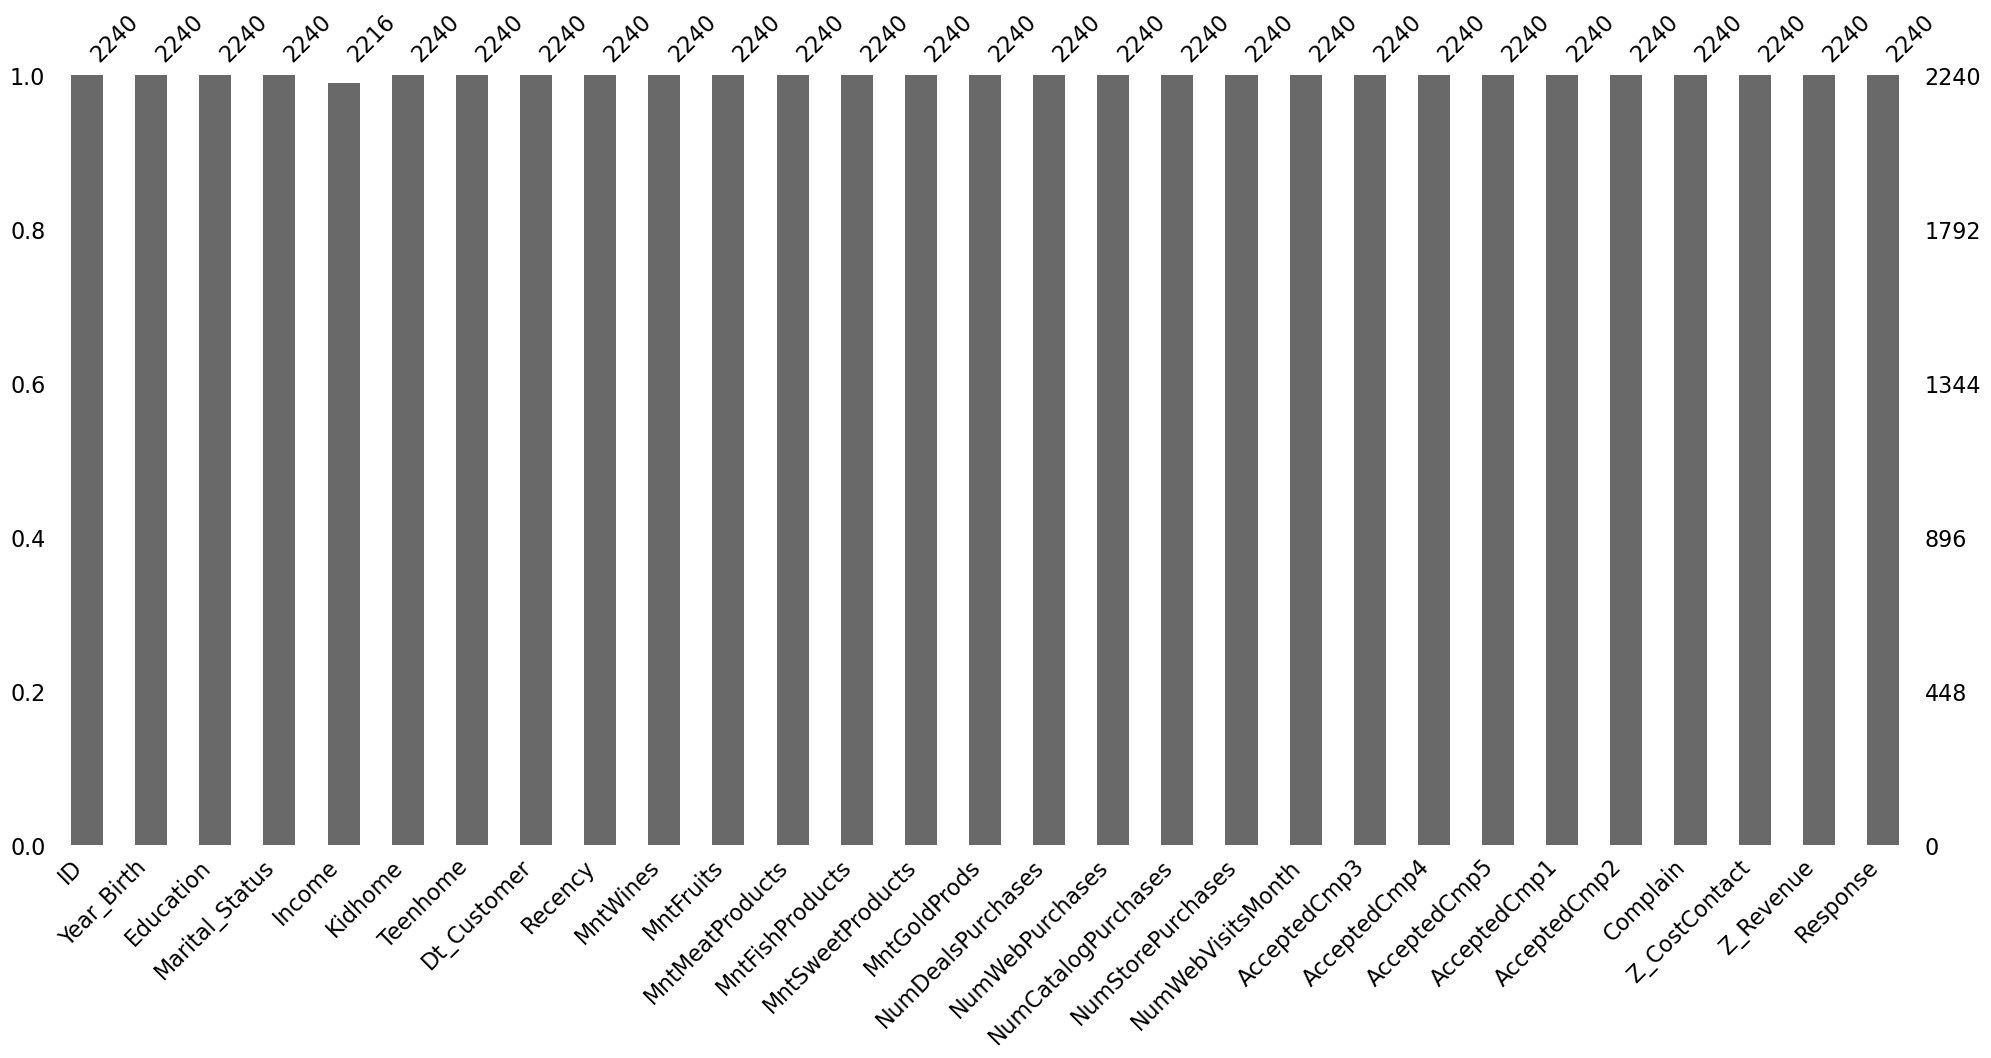

In [11]:
# Visualize the missing Value
import missingno as msno
msno.bar(df)

# This visualization help us to see which column has the missing value

**Insight:**
From this graph, we can see that the missing values account for only 1% of the data. Therefore, deleting the rows with missing values will not significantly affect the overall dataframe.

In [12]:
# Remove the missing row value
df = df.dropna()

In [13]:
# Check for the duplicate
df.duplicated().sum()

0

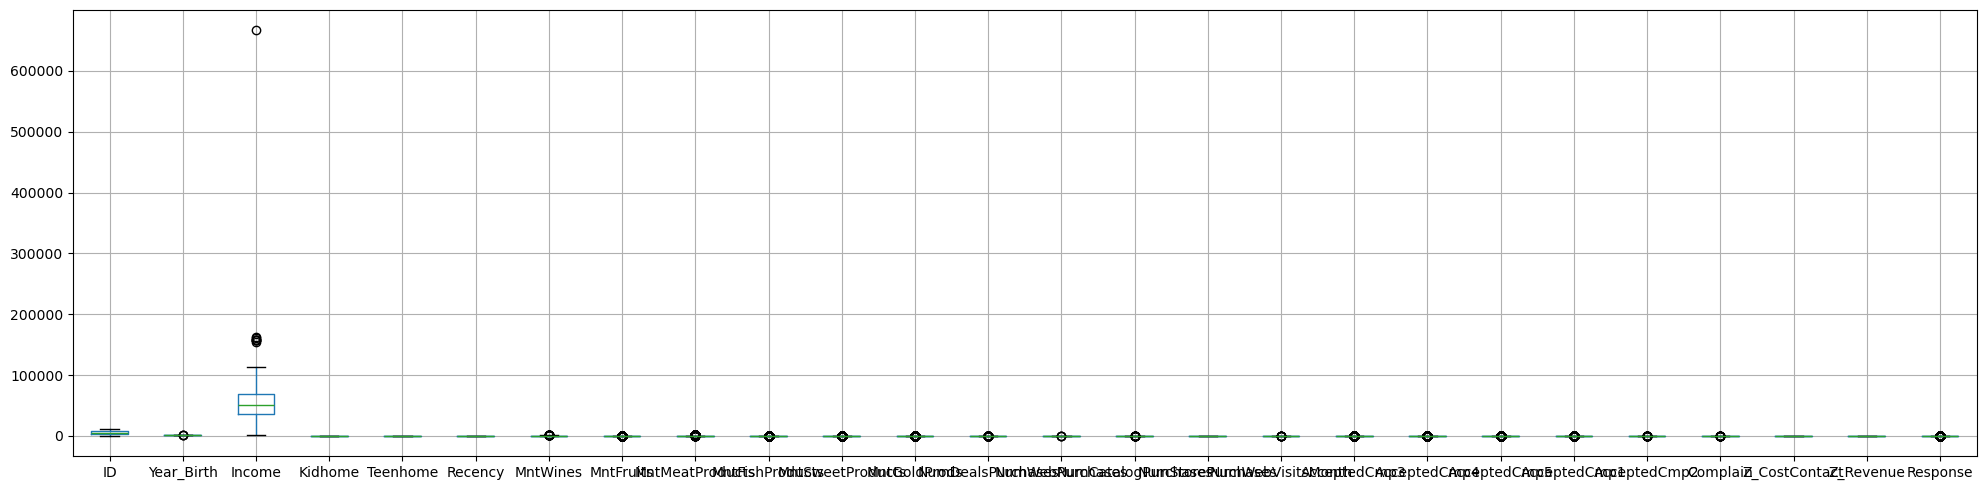

In [14]:
# Checking for the outliers
fig, ax = plt.subplots(figsize=(20,5))

df.boxplot()
plt.tight_layout()

**Insight:**
All columns in the dataframe do not show any outliers, except for the 'Income' column. Therefore, we will conduct a deeper analysis on that column

{'whiskers': [<matplotlib.lines.Line2D at 0x156e239a090>,
 'caps': [<matplotlib.lines.Line2D at 0x156e239a5d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x156e2213a10>],
 'medians': [<matplotlib.lines.Line2D at 0x156e239ab70>],
 'fliers': [<matplotlib.lines.Line2D at 0x156e239ae70>],
 'means': []}

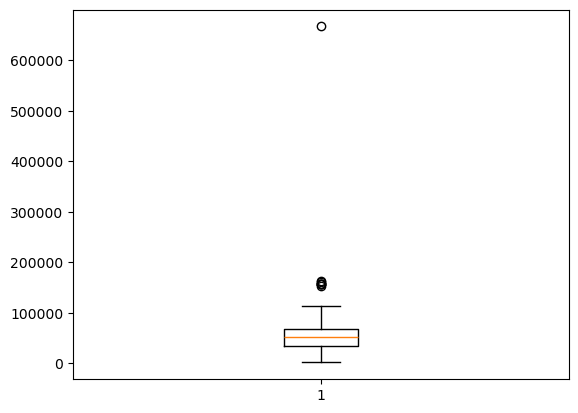

In [15]:
# Checking outliers in 'Income' column
plt.boxplot(df['Income'])

In [16]:
# Calculate the IQR for the Income column
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3-Q1

#Identify the outliers in the Income column
outliers = df[(df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR))]

#Print the number of outliers
print('Number of outliers in the Income column:', len(outliers))


Number of outliers in the Income column: 8


**Insight:**
After calculating the Interquantile Range (IQR), we found 8 data points that are considered outliers. Since the number is relatively small, we will remove the rows containing these outlier values

In [17]:
# remove the outlier data
df = df[~((df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR)))]

In [18]:
print('\n Final shape of the dataframe:', df.shape)


 Final shape of the dataframe: (2208, 29)


## Creating New Features and fields

In [19]:
print('Unique values in Marital Status Column :', df['Marital_Status'].unique())
print('Unique values in Education Column :', df['Education'].unique())


Unique values in Marital Status Column : ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Unique values in Education Column : ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


In [20]:
# Categorizing marital status into two types (Single & Married)
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Married' if x in ['Together', 'Married'] else 'Single')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Married,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Married,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Single,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Married,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [21]:
df['Education'] = df['Education'].apply(lambda x: 'High' if x in ['Graduation', 'PhD', 'Master', '2n Cycle'] else 'Low')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,High,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,High,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,High,Married,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,High,Married,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,High,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,High,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,High,Married,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,High,Single,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,High,Married,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [22]:
# Create total_spend column for each purchases
df['Total_Spend'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Total_Spend']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Total_Spend, Length: 2208, dtype: int64

In [23]:
# Creating 'Month' and 'Year' column
df['Month'] = df['Dt_Customer'].dt.month
df['Year'] = df['Dt_Customer'].dt.year

## Data Visualization

Text(0, 0.5, 'Count')

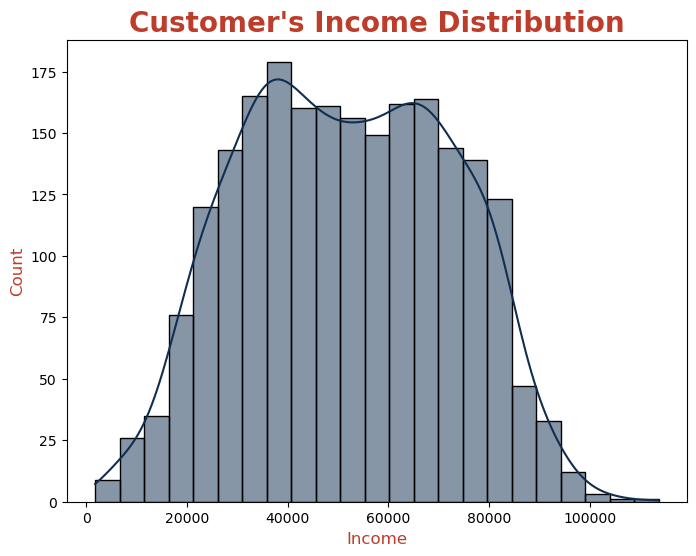

In [24]:
# Customer's income distribution
fig, ax = plt.subplots(figsize=(8, 6))

ax = sns.histplot(data=df, x='Income', kde=True, color='#102E50')
plt.title("Customer's Income Distribution", fontsize=20, fontweight=550, color='#BE3D2A')
plt.xlabel('Income', fontsize=12, color='#BE3D2A')
plt.ylabel('Count', fontsize=12, color='#BE3D2A')

**Insight:**  
The majority of customers have a yearly income ranging from $30.000 - $70.000, which places them in the middle-class segment. Some key characteristics of this group include:
- They tend to choose products that offer good quality at affordable prices
- They prefer durable products that last longer
- They're more likely to choose products with clear functionality and direct relevance to their daily lives, making them more inclined toward practical and efficient solutions.
- They tend to be discount hunters, always looking for deals to save on expenses 
  
**Recommendation:**  
Based on the characteristic, the marketing campaign should focus on discounts and consider offering bundled products to attract customers attention

Text(0.5, 0, 'Channel')

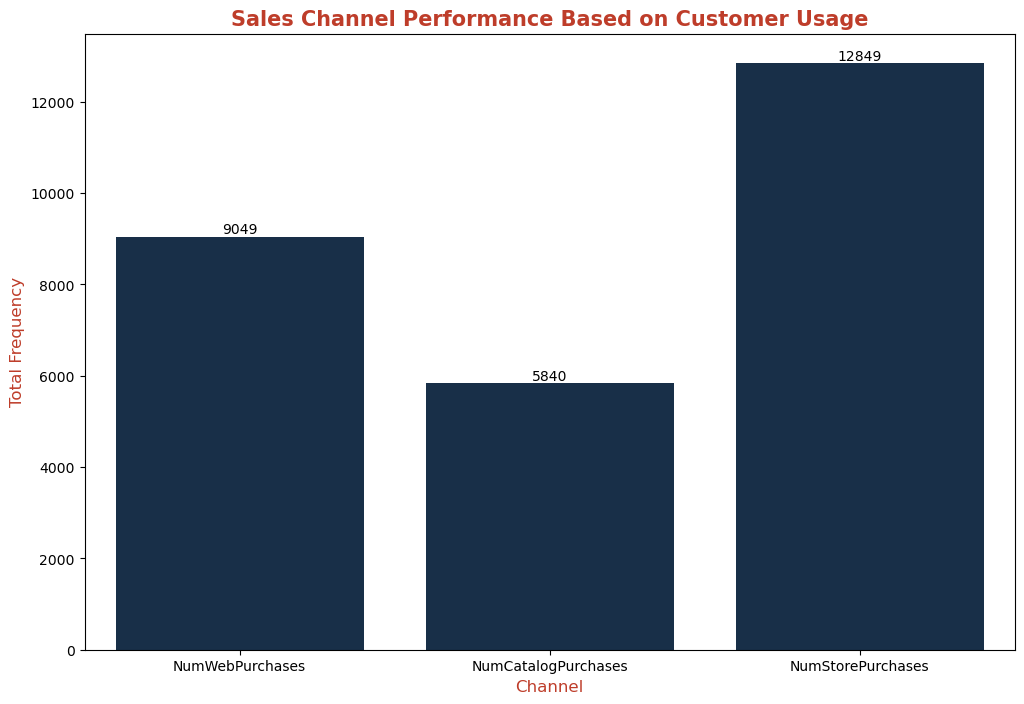

In [25]:
# Sales Channel Performance Based on Customer Usage
# Calculate every sales channel and convert it to the new dataframe
total_purchase = df[['NumWebPurchases',	'NumCatalogPurchases', 'NumStorePurchases']].sum()
total_purchase_df = total_purchase.reset_index()
total_purchase_df.columns = ['Channel', 'Total Revenue']

# Plotting the Data
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(data=total_purchase_df, x='Channel', y='Total Revenue', color='#102E50')
for container in ax.containers:
    ax.bar_label(container, fmt='%g', fontsize=10)
plt.title('Sales Channel Performance Based on Customer Usage', fontsize=15, fontweight=550, color='#BE3D2A')
plt.ylabel('Total Frequency', fontsize=12, color='#BE3D2A')
plt.xlabel('Channel', fontsize=12, color='#BE3D2A')

**Insight:**  
Based on the graphs, customers tend to prefer shopping directly at the store, followed by using the website and catalog. Referring to the product categories in the dataset, we can conclude that this dataset originates from a supermarket.  
  
**Recommendation**
- Provide more shopping trolleys to improve customer convenience while shopping in-store.
- Organize products by category to make it easier for customers to find what they need.
- Install clear signage throughout the store to guide customers efficiently.
- Introduce a loyalty card program that offers special discounts for in-store purchases to boost customer loyalty and encourage repeat visits.

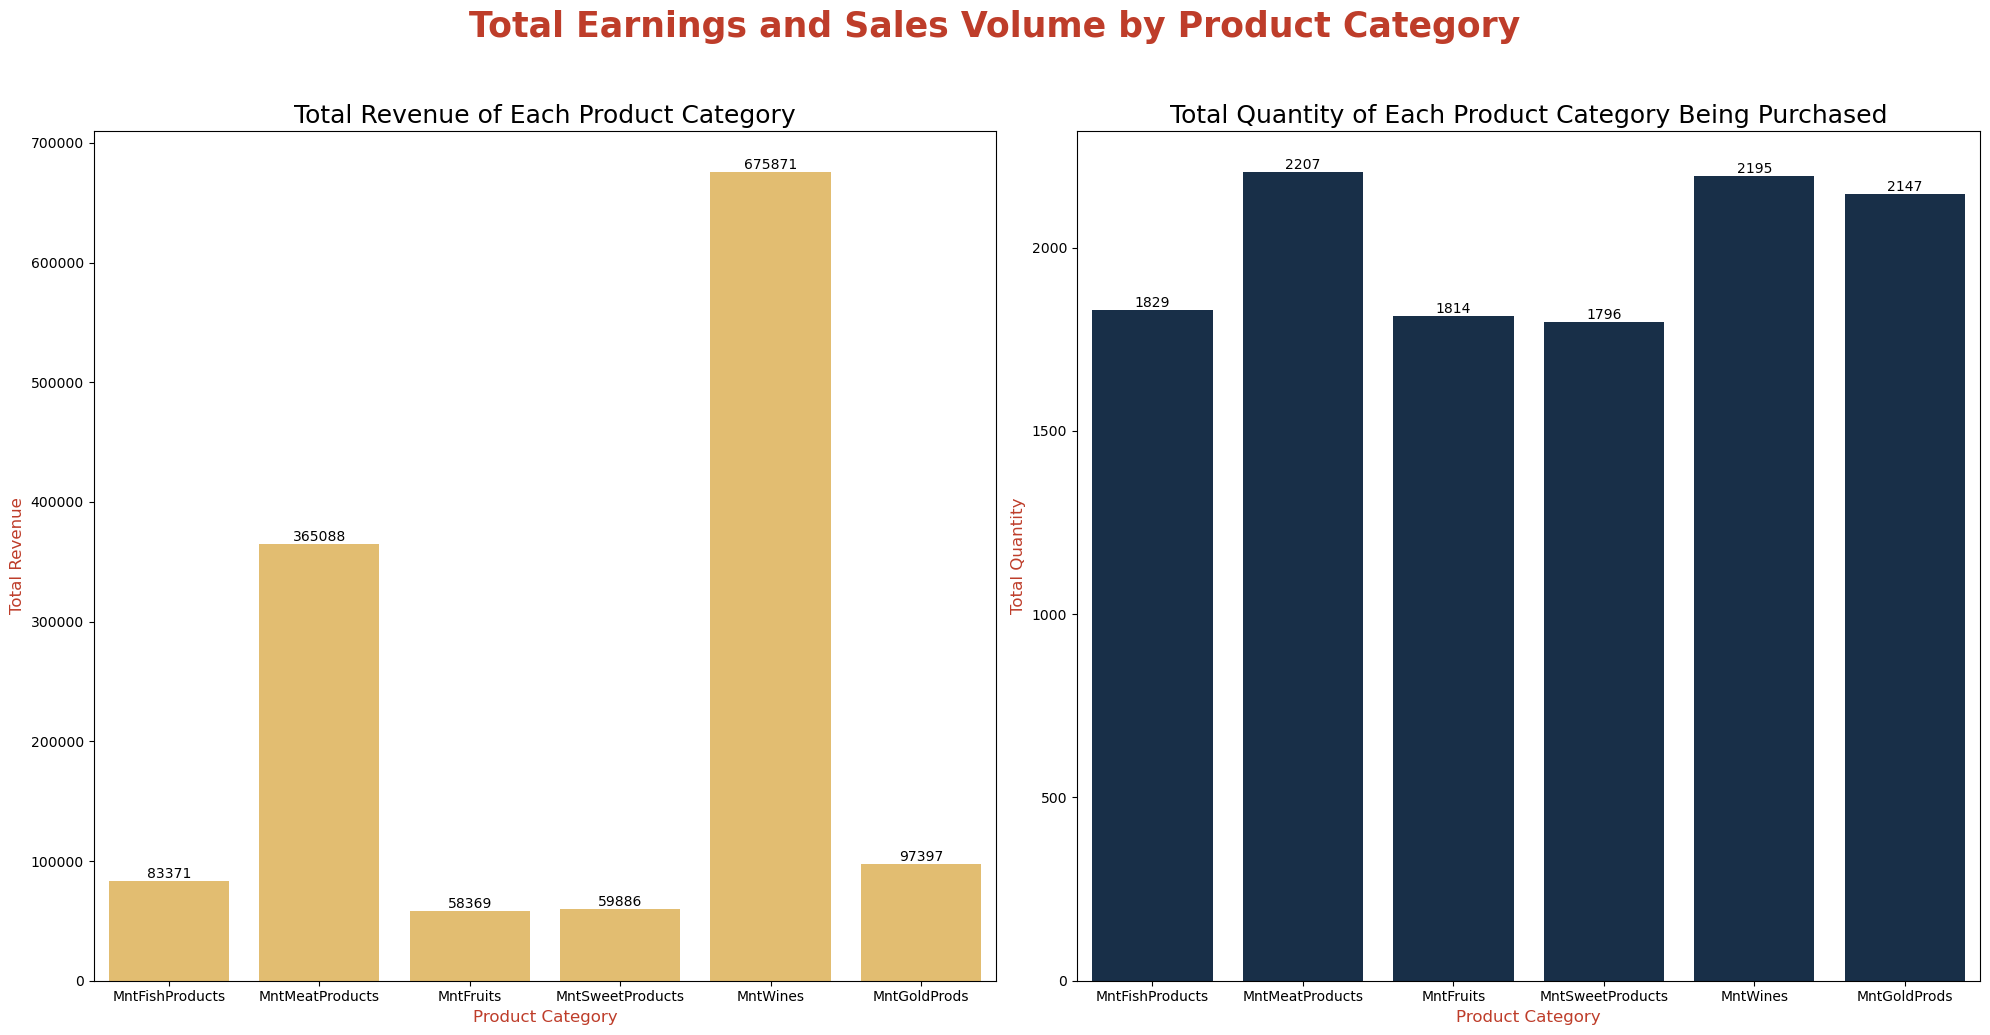

In [26]:
# Overall Product Categories Purchased by Marital Status
# Calculate the total revenue of each product type and convert it to the new dataframe
Total_Product_Purchase = df[['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']].sum()
Total_Product_Purchase_df = Total_Product_Purchase.reset_index()
Total_Product_Purchase_df.columns = ['Product Type', 'Total Revenue']

# Calculate the number of each type of product being purchased
product_count = ['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']
product_count = (df[product_count] != 0).sum()
product_count_df = product_count.reset_index()
product_count_df.columns = ['Product Type', 'Total Quantity']
product_count_df
# Plot the data
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax1 = sns.barplot(data=Total_Product_Purchase_df, x='Product Type', y='Total Revenue', color = '#F5C45E', ax=ax[0])
for container in ax1.containers:
    ax1.bar_label(container, fmt='%g')
ax1.set_title('Total Revenue of Each Product Category', fontsize=18)
ax1.set_xlabel('Product Category', fontsize=12, color='#BE3D2A')
ax1.set_ylabel('Total Revenue', fontsize=12, color='#BE3D2A')
ax2 = sns.barplot(data=product_count_df, x='Product Type', y='Total Quantity', color='#102E50', ax=ax[1])
for container in ax2.containers:
    ax2.bar_label(container, fmt='%g')
ax2.set_title('Total Quantity of Each Product Category Being Purchased', fontsize=18)
ax2.set_xlabel('Product Category', fontsize=12, color='#BE3D2A')
ax2.set_ylabel('Total Quantity', fontsize=12, color='#BE3D2A')
plt.suptitle('Total Earnings and Sales Volume by Product Category', fontsize=25, color='#BE3D2A', weight='bold', y=1.03)
plt.tight_layout()

**Insight:**  
Wines and meat products generated the highest revenue. Interestingly, the quantity sold across all product categories is relatively similar, which indicates that wine is priced higher than the other product categories.  
  
**Recommendation:**  
Since wine generates a high revenue, a targeted promotional campaign could be implemented for this product, including:  
- Discounted bundling of wine with cheese or meat products (cross-selling).
- Create a 'Wine of The Month' program with special spotlight features to highlight premium selections.
- A loyalty card program offering greater rewards for wine purchases to incentivize repeat purchases and customer retention.

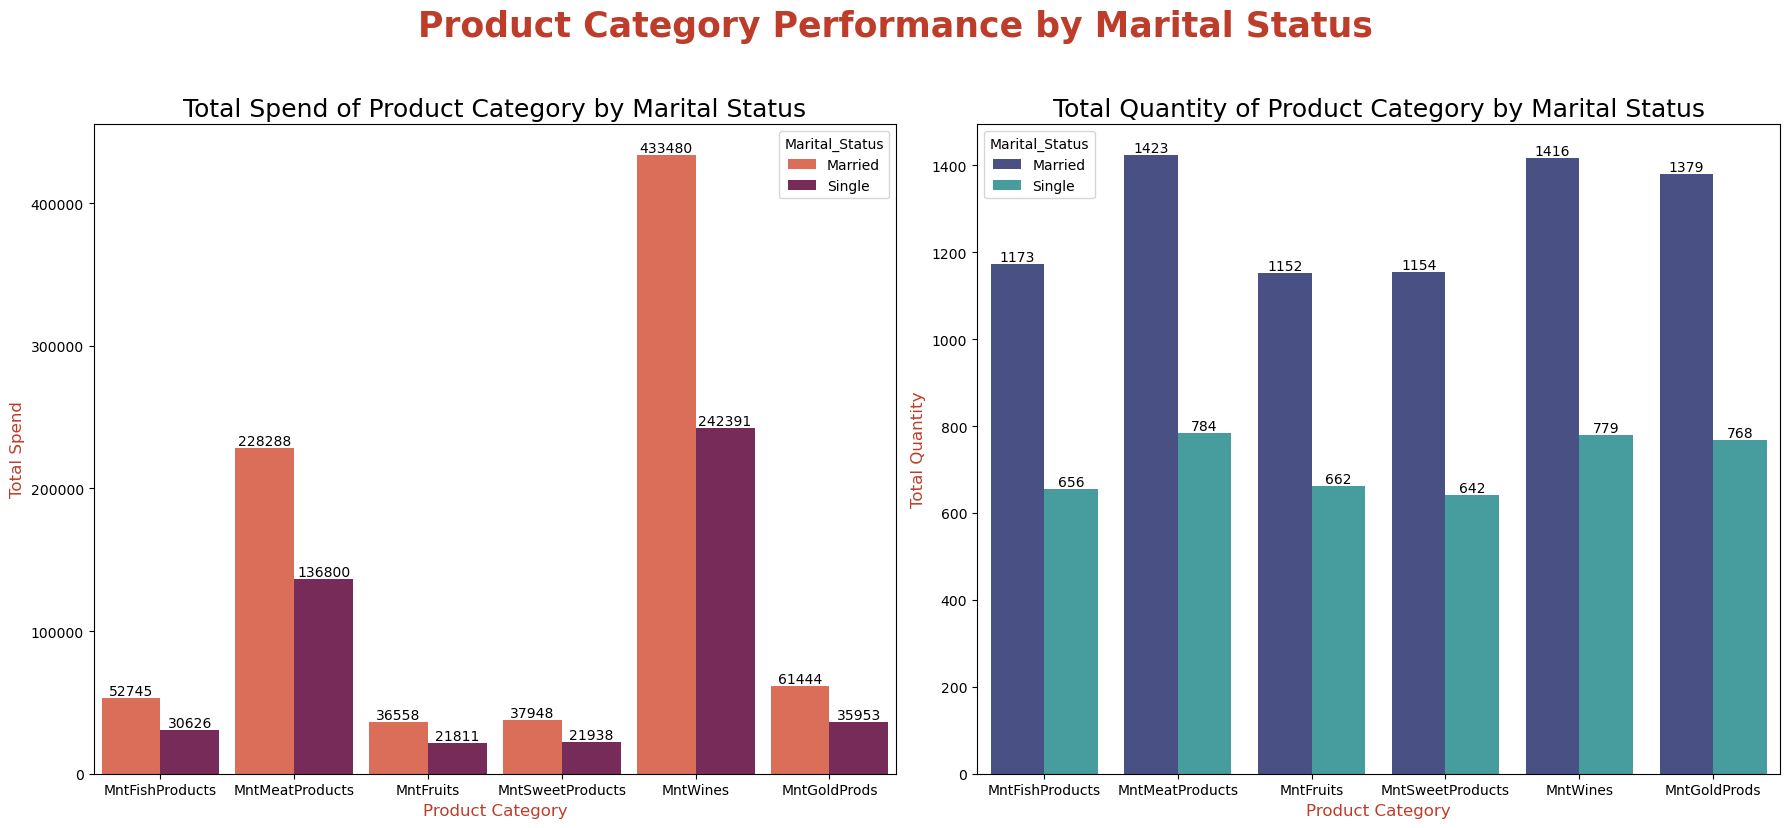

In [27]:
# Product Category Purchases by Marital Status
# Calculate The Total Spend of Each Product Category by Marital Status
Product_Spend_byMarital = df.pivot_table(index='Marital_Status', values=df[['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']], aggfunc='sum')
Product_Spend_byMarital = Product_Spend_byMarital.reset_index().melt(id_vars='Marital_Status', value_vars=['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds'], 
                                var_name='Product Category', value_name='Total Spend')

# Calculate The Total Quantity of Each Product Category by Marital Status
product_cols = ['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']
df_products = df[['Marital_Status'] + product_cols]

df_products_bool = df_products.copy()
df_products_bool[product_cols] = df_products_bool[product_cols] > 0
Product_Quantity_byMarital = df_products_bool.groupby('Marital_Status')[product_cols].sum()
Product_Quantity_byMarital = Product_Quantity_byMarital.reset_index().melt(id_vars='Marital_Status', value_vars=product_cols, var_name='Product Category', value_name='Total Quantity')

# Plot The Data
fig, ax = plt.subplots(1, 2, figsize=(18,8))

ax1 = sns.barplot(data=Product_Spend_byMarital, x='Product Category', y='Total Spend', hue='Marital_Status', ax=ax[0], width=0.88, palette='rocket_r')
for container in ax1.containers:
    ax1.bar_label(container, fmt='%g')
ax1.set_title('Total Spend of Product Category by Marital Status', fontsize=18)
ax1.set_xlabel('Product Category' ,color='#BE3D2A', fontsize=12)
ax1.set_ylabel('Total Spend' ,color='#BE3D2A', fontsize=12)

ax2 = sns.barplot(data=Product_Quantity_byMarital, x='Product Category', y='Total Quantity', hue='Marital_Status', ax=ax[1], palette='mako')
for container in ax2.containers:
    ax2.bar_label(container, fmt='%g')
ax2.set_title('Total Quantity of Product Category by Marital Status', fontsize=18)
ax2.set_xlabel('Product Category' ,color='#BE3D2A', fontsize=12)
ax2.set_ylabel('Total Quantity', color='#BE3D2A', fontsize=12)

plt.suptitle('Product Category Performance by Marital Status', fontsize=25, color='#BE3D2A', weight='bold', y=1.03)
plt.tight_layout()

**Insight:**  
The majority of spending across all product categories is dominated by married customers, whic also applies to the total quantity of products purchased. This suggests that married customers tend to be more consumptive than single customers. This behavior may be influenced by household purchasing patterns, where married individuals often buy in larger quantities to meet the needs of their families.

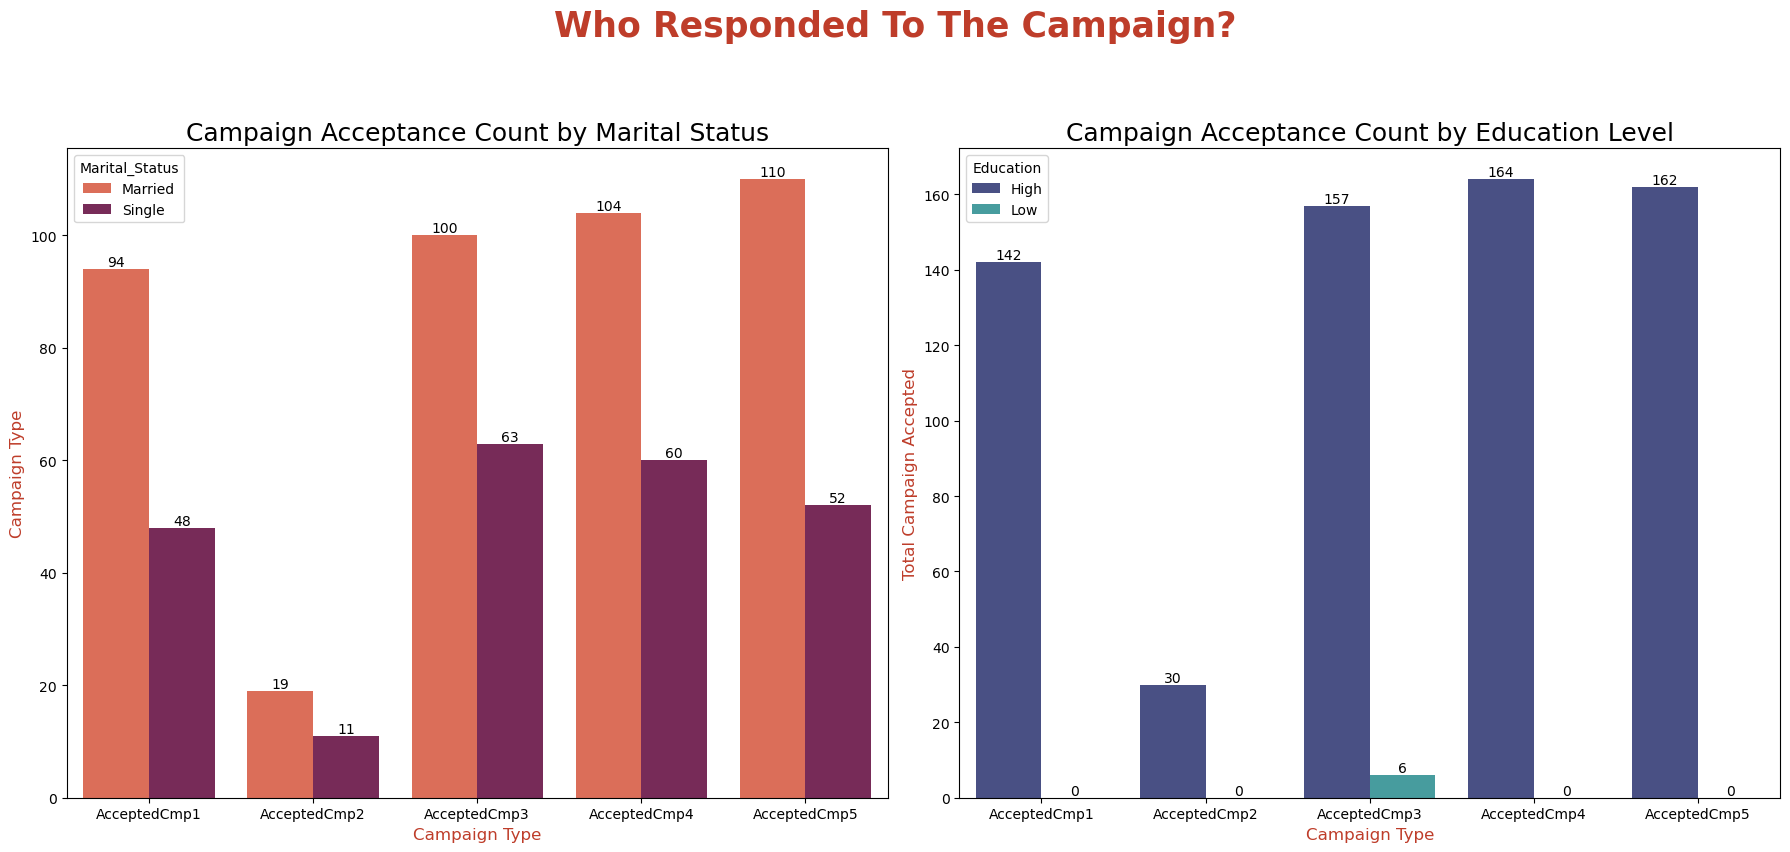

In [28]:
# Grouping  total campaign accepted by Marital Status
campaign = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
campaign_by_marital = df[['Marital_Status'] + campaign]
campaign_by_marital = campaign_by_marital.groupby('Marital_Status')[campaign].sum()
campaign_by_marital_df = campaign_by_marital.reset_index().melt(id_vars='Marital_Status', value_vars=campaign, value_name='Total Campaign Accepted', var_name='Campaign Type')

# Grouping total campaign accepted by Education
campaign_by_education = df[['Education'] + campaign]
campaign_by_education = campaign_by_education.groupby('Education')[campaign].sum()
campaign_by_education_df = campaign_by_education.reset_index().melt(id_vars='Education', value_vars=campaign, value_name='Total Campaign Accepted', var_name='Campaign Type')

# Plot the Data
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

ax1 = sns.barplot(data=campaign_by_marital_df, x='Campaign Type', y='Total Campaign Accepted', hue='Marital_Status', ax=ax[0], palette='rocket_r')
for container in ax1.containers:
    ax1.bar_label(container, fmt='%g')
ax1.set_title('Campaign Acceptance Count by Marital Status', fontsize=18)
ax1.set_xlabel('Campaign Type', fontsize=12, color='#BE3D2A')
ax1.set_ylabel('Campaign Type', fontsize=12, color='#BE3D2A')

ax2 = sns.barplot(data=campaign_by_education_df, x='Campaign Type', y='Total Campaign Accepted', hue='Education', ax=ax[1], palette='mako')
for container in ax2.containers:
    ax2.bar_label(container, fmt='%g')
ax2.set_title('Campaign Acceptance Count by Education Level', fontsize=18)
ax2.set_xlabel('Campaign Type', fontsize=12, color='#BE3D2A')
ax2.set_ylabel('Total Campaign Accepted', fontsize=12, color='#BE3D2A')\

plt.suptitle('Who Responded To The Campaign?', fontsize=25, color='#BE3D2A', y=1.06, weight='bold')
plt.tight_layout()

**Insight:**  
Among all the marketing campaigns carried out, the majority were effectively targeted at customers who are married and have a high level of education (Graduation, PhD, Master, and 2nd Cycle). This can serve as a valuable reference for the marketing team to design future campaigns aimed at this specific segment. Actions that can be taken include adjusting the tone of languange and visual elements in the campaign to better resonate with their profile.

Text(0.5, 1.02, 'Customer Enrollment Trend Over The Years')

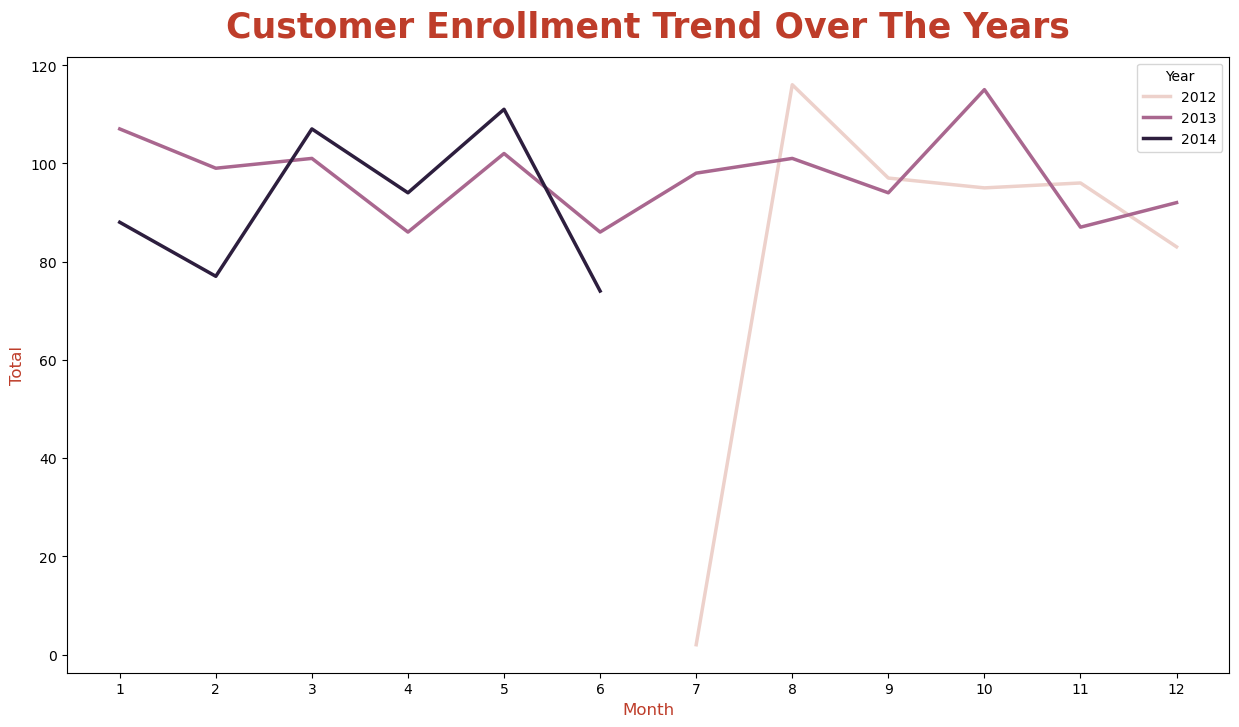

In [29]:
# Grouping 'Year' & 'Month' column for visualization
count_data = df.groupby(['Year', 'Month']).size().reset_index(name='total')

# Plot The Data
fig, ax = plt.subplots(figsize=(15, 8))
ax=sns.lineplot(data=count_data, x='Month', y='total', hue='Year', linewidth=2.5,)
plt.xlabel('Month', fontsize=12, color='#BE3D2A')
plt.ylabel('Total', fontsize=12, color='#BE3D2A')
plt.xticks(range(1,13))
plt.title('Customer Enrollment Trend Over The Years', fontsize=25, weight='bold', color='#BE3D2A', y=1.02)

**Insight:**  
Customer enrollment over the months may not accurately represent the actual trend, as several months are missing enrollment data. However, based on the available chart, it can be concluded that there is potential for further expansion in customer enrollment. This growth can be encouraged by offering attractive benefits to subscribers, such as discounts or reward points

## Summary

This analysis highlights key customer behavior patterns and provides strategic recommendations based on sales data and marketing campaign performance. The majority of customers fall within the middle-class income range, showing a preference for practical and affordable products with long-term value. Married customers with higher education levels tend to be the most engaged segment, both in terms of spending and response to campaigns. High-revenue products like wine offer an opportunity for focused promotions due to their strong revenue. In-store shopping remains the preferred channel, suggesting the need to enhance the physical shopping experience through better facilities and loyalty incentives. Although customer enrollment data is incomplete, there is clear potential for growth by offering appealing subscription benefits such as discounts and reward points. Overall, these insights can guide the development of more targeted, data-driven marketing strategies that align with customer needs and behavior.